<a href="https://colab.research.google.com/github/avinashmane/colab/blob/master/strava_likers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup Code/Parameters
* Setup
    * needs
        * auth
        * gsheet auth
        * cfg_strava
* updates sheets
* Todo
    * low: error: location not found 

## Config

In [1]:
CONFIG_FILE='config.yaml'


import yaml
import os,sys
with open(CONFIG_FILE,"r+") as _c:
    cfg=yaml.load(_c,yaml.Loader)
for x in cfg['env'][os.name]: 
    os.environ[x]=cfg['env'][os.name][x]
    globals()[x]=cfg['env'][os.name][x]

repo=cfg['repo']#'https://github.com/avinashmane/colab.git'

if os.name=='nt':
    LIB= r'c:\m\lib'
    LOG= r'c:\m\social-media-automation'
    AUTH= r'c:\i\auth'
    sys.path.append("./lib")
else:
    if not os.path.exists('drive'):
        from google.colab import drive
        drive.mount('/content/drive')
    LIB='/content/drive/MyDrive/m/lib'
    LOG='/content/drive/MyDrive/m/lib'
    AUTH='/content/drive/MyDrive/m/auth'
    if not os.path.exists('m'):
      !ln -sd '/content/drive/MyDrive/m/' m
    if not os.path.exists('./repo'):
      !git clone $repo repo
    sys.path.append('repo')
    sys.path.append("repo/lib")
sys.path.append(LIB)


In [2]:
import importlib
import utils
importlib.reload(utils)
utils.setup_env(cfg['packages'],cfg['modules'])

'Environment setup'

## Code

In [3]:
import yaml
from datetime import datetime
import os
from nerodia.browser import Browser
import nerodia
import re
import logging
from IPython.display import Image, Markdown
import pandas as pd

import utils

import socialmediasite 
importlib.reload(socialmediasite)
Strava=socialmediasite.Strava
SocialMediaSite=socialmediasite.SocialMediaSite


In [4]:
"reach gsheet"

import gsheets
Gsheet=gsheets.Gsheet


In [5]:
df_mc=Gsheet(cfg['sheets']['stravasync']['url']).getSheetDf(cfg['sheets']['stravasync']['tab'],start='A10')

# ssl=Gsheet('stravasync')
# df_mc

# Process
## Create headless

In [6]:
" Test Selenium headless"
if True:
    if os.name=='nt':
        b=Browser('chrome',)
    else:
        
        # import sys
        # sys.path.insert(0,f'{DIR}/geckodriver')
        from selenium import webdriver

        chrome_options = webdriver.ChromeOptions()
        chrome_options.add_argument('--headless')
        chrome_options.add_argument('--no-sandbox')
        chrome_options.add_argument('--disable-dev-shm-usage')
        # b =webdriver.Chrome('chromedriver',options=chrome_options)
        b=Browser('chrome',options=chrome_options,)
    
    utils.setLogger(f"{LOG}/strava-automation.log")
    

2022-08-31 23:49:45:INFO:Logger file: c:\m\social-media-automation/strava-automation.log


In [7]:

strava=Strava(b,authFile=f'{AUTH}/auth.yaml',cfgFile=f"{LIB}/cfg_strava.yaml",delay=.5)
strava.logGSheet = Gsheet(cfg['sheets']['StravaPromoLog']['url']).getSheetByTitle('StravaPromoLog')
strava.StravaMembers=df_mc.query('strava=="strava"').id.values

sessionGSheet = Gsheet(cfg['sheets']['StravaPromoLog']['url']).getSheetByTitle('SessionLog')

In [8]:
# strava.login("avinash")

# Image(b.screenshot.png())

## A. Give likes in feed

# b.goto('https://www.strava.com/clubs/196654/recent_activity')

# strava.scrolldown(9)

# logging.info(f"Total number of cards on {strava.browser.title}: {len(b.divs(class_name=re.compile('^EntryHeader')))}")

# strava.giveKudos()

In [9]:
# strava.logout()

## B. Give likes on Club

### avinash Feed Likes

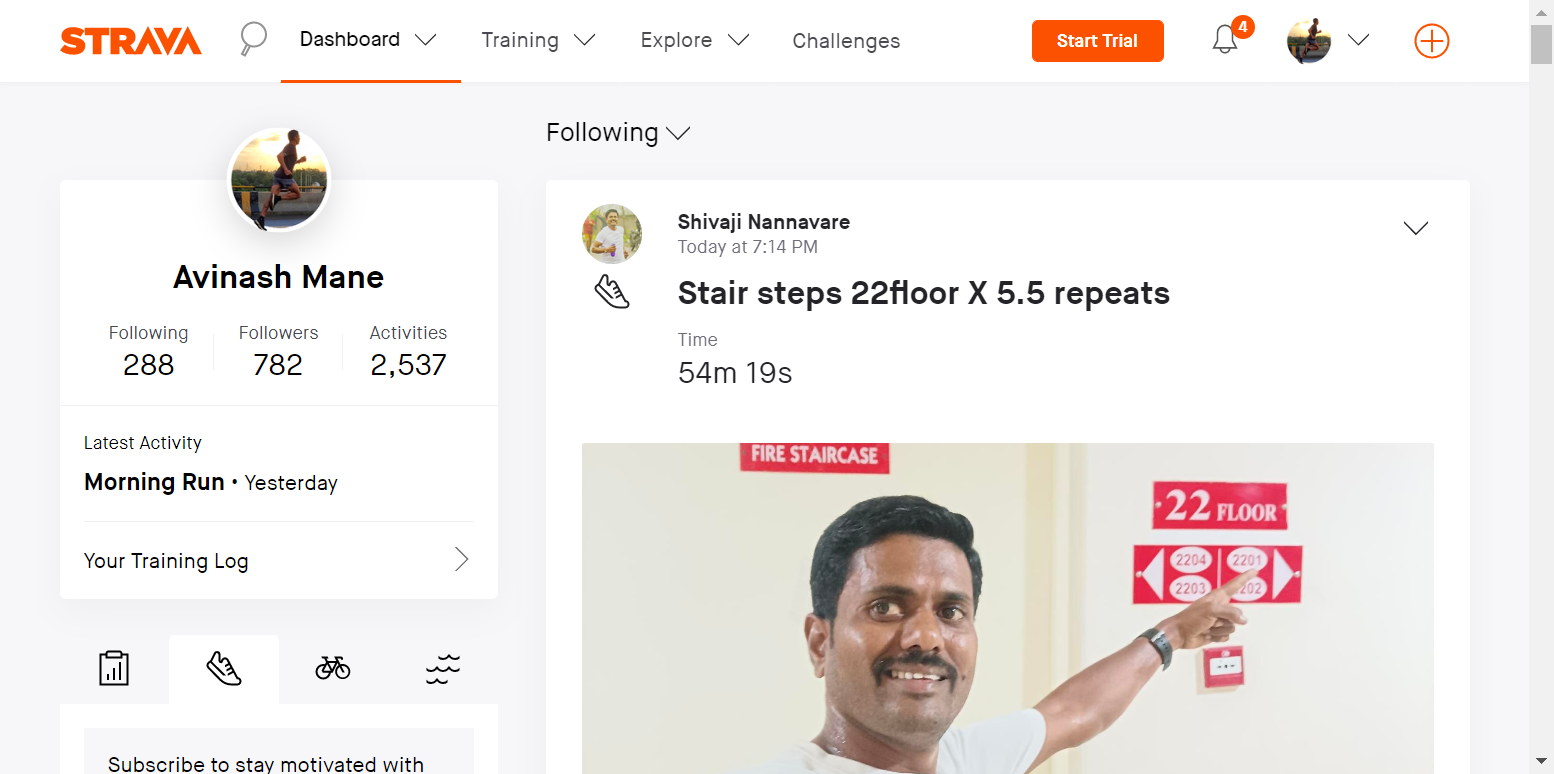

2022-08-31 23:50:12:INFO:Total number of cards on avinash/Dashboard | Strava: 59


###  avinash https://www.strava.com/clubs/delhirunnersgroup Club Likes

2022-08-31 23:50:20:INFO:Total number of cards on https://www.strava.com/clubs/delhirunnersgroup 'New Delhi, Delhi, India Club | DRG Delhi Runners Group on Strava': 20
2022-08-31 23:50:23:INFO:giveKudos: 0,nonMember,https://www.strava.com/athletes/72225315 Manish Agarwal,https://www.strava.com/activities/7732583440 Lunch Run
2022-08-31 23:50:26:INFO:giveKudos: 1,nonMember,https://www.strava.com/athletes/20458687 Salvatore Spinella,https://www.strava.com/activities/7732580342 Corsa serale
2022-08-31 23:50:29:INFO:giveKudos: 2,nonMember,https://www.strava.com/athletes/8629989 Antonio Manuel,https://www.strava.com/activities/7732485195 Corrida ao entardecer
2022-08-31 23:50:32:INFO:giveKudos: 3,nonMember,https://www.strava.com/athletes/8629989 Antonio Manuel,https://www.strava.com/activities/7732484420 Corrida vespertina
2022-08-31 23:50:35:INFO:giveKudos: 4,nonMember,https://www.strava.com/athletes/15394320 Mahesh Tiwari,https://www.strava.com/activities/7732561250 Night Run.. 13km..wron

### mileage_league_strava Feed Likes

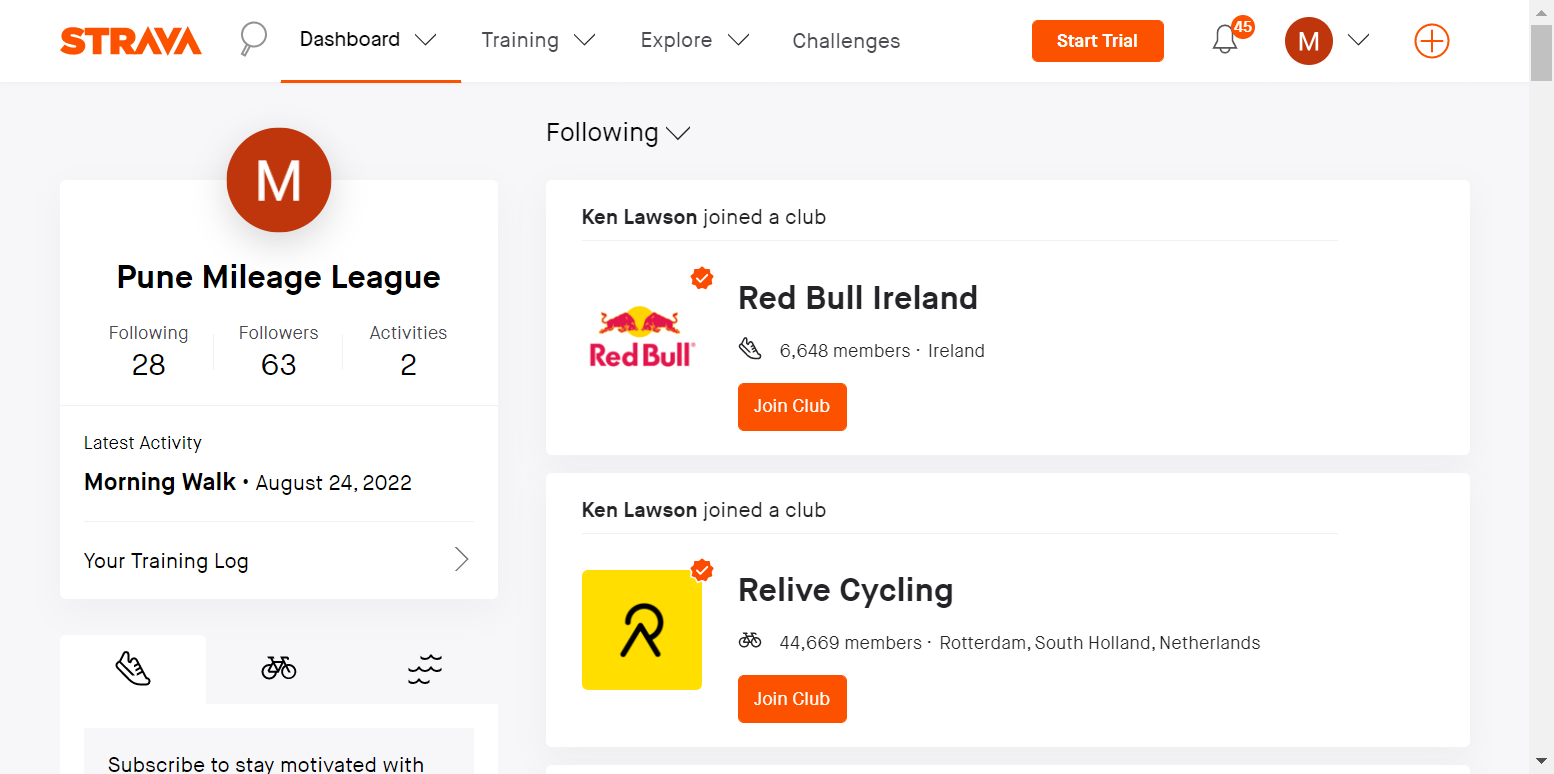

2022-08-31 23:50:53:INFO:Total number of cards on mileage_league_strava/Dashboard | Strava: 59


###  mileage_league_strava https://www.strava.com/clubs/pcmcrunners Club Likes

2022-08-31 23:50:58:INFO:Total number of cards on https://www.strava.com/clubs/pcmcrunners 'Pimpri-Chinchwad, Maharashtra, India Club | PCMCRunners on Strava': 20


###  mileage_league_strava https://www.strava.com/clubs/pcmcbikers Club Likes

2022-08-31 23:51:04:INFO:Total number of cards on https://www.strava.com/clubs/pcmcbikers 'Pimpri-Chinchwad, Maharashtra, India Club | PCMC Tring Tring on Strava': 20
2022-08-31 23:51:14:WARNING:giveKudos: 0 error clicking TimeoutError("timed out after 10 seconds, waiting for true condition on #<SVG: located: False; {'title': re.compile('.*ive kudos'), 'tag_name': 'button', 'index': 0} --> {'data_testid': 'filled_kudos', 'tag_name': 'svg'}>")
2022-08-31 23:51:14:ERROR:Internal Python error in the inspect module.
Below is the traceback from this internal error.

2022-08-31 23:51:14:INFO:
Unfortunately, your original traceback can not be constructed.

2022-08-31 23:51:14:ERROR:Internal Python error in the inspect module.
Below is the traceback from this internal error.

2022-08-31 23:51:14:INFO:
Unfortunately, your original traceback can not be constructed.

2022-08-31 23:51:14:ERROR:Internal Python error in the inspect module.
Below is the traceback from this internal error.

2022-08-31

Traceback (most recent call last):
  File "./lib\socialmediasite.py", line 217, in giveKudo
    kudoTag.svg(data_testid="filled_kudos").wait_until(method=lambda x: x.exists)
  File "c:\sw\python37\lib\site-packages\nerodia\wait\wait.py", line 111, in wait_until
    object=object)
  File "c:\sw\python37\lib\site-packages\nerodia\wait\wait.py", line 36, in until
    raise TimeoutError(cls._message_for(timeout, object, message))
nerodia.wait.wait.TimeoutError: timed out after 10 seconds, waiting for true condition on #<SVG: located: False; {'title': re.compile('.*ive kudos'), 'tag_name': 'button', 'index': 0} --> {'data_testid': 'filled_kudos', 'tag_name': 'svg'}>

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\AvinashMane\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-10-e335c35e0668

In [ ]:
# b.goto('https://www.strava.com/clubs/196654/recent_activity')

for _user,_config in {
                    "avinash":"avinash",
                    "mileage_league_strava":"mileage_league_strava",
                    # "strava_pcmcrunners":"strava_pcmcrunners"
                    }.items():
    display(Markdown(f"### {_user} Feed Likes"))
    strava.login(_user)
    display(Image(b.screenshot.png()))
    strava.scrolldown(6) 
    _cards=len(b.divs(class_name=re.compile('^Card')))
    logging.info(f"Total number of cards on {_user}/{strava.browser.title}: {_cards}")
    ret=strava.giveKudos()
    #SessionLog :   Date	SessionType	User	Feed	cards	actions
    sessionGSheet.append_table([[pd.Timestamp.now().isoformat(),"Kudos",_user,'feed',_cards,ret['count']]])
    
    for club in strava.cfg[_config]['clubs']:
      display(Markdown(f"###  {_user} {club} Club Likes"))
      strava.goto(f"{club}/recent_activity")
      _cards=len(b.divs(class_name=re.compile('^Card')))
      logging.info(f"Total number of cards on {club} '{strava.browser.title}': {_cards}")
      ret=strava.giveKudos()
      #SessionLog :   Date	SessionType	User	Feed	cards	actions
      sessionGSheet.append_table([[pd.Timestamp.now().isoformat(),"Kudos",_user,club,_cards,ret['count']]])
    strava.logout()
logging.info(f"All Groups done")    

#  Mileage Certificates

In [10]:
strava.login("mileage_league_strava")

ERROR! Session/line number was not unique in database. History logging moved to new session 3294


2022-08-31 23:51:28:INFO:Logged in with mileage.league@gmail.com


In [19]:
certSheet=Gsheet(cfg['sheets']['certs']['url'])
certTab=certSheet.getSheetByTitle(cfg['sheets']['certs']['tab'])
df_cert=certTab.get_as_df().query("comment_text!='' and Activity==''"
                                   ).reset_index()
cols={x:df_cert.columns.get_loc(x)+1 for x in ['comment_ts','comment_text']}
# display(cols)
# merge
_df=df_cert.merge(df_mc[['Email','profile','strava']],on='Email')

c:\sw\python37\lib\site-packages\pygsheets\worksheet.py:1477: UserWarning: At least one column name in the data frame is an empty string. If this is a concern, please specify include_tailing_empty=False and/or ensure that each column containing data has a name.
  warnings.warn('At least one column name in the data frame is an empty string. If this is a concern, please specify include_tailing_empty=False and/or ensure that each column containing data has a name.')


{'comment_ts': 14, 'comment_text': 13}

In [20]:
_df

,index,CertType,Email,Milestone,Achieved,Name,Date,ID,Team,Row,dummy,filler,comment_text,comment_ts,Activity,,profile,strava
0,1174,RunDays,dmanojk2004@yahoo.co.in,150,150.0,Manoj Kulkarni,8/27/2022,1jLX5LtsxRgzQau5IZK7MM4k1-8RQ5r-S,P,1176,,,Congratulations on completion of 150 days of r...,,,,,strava
1,1176,Everests,mahendra.kadam20@gmail.com,1,8878.2,Mahendra Kadam,8/28/2022,1H3JT4iLwEZmOOKDN2PRMK_aym9XRV6PN,N,1178,,,Congratulations on climbing 1 Mt. Everests thi...,,,,,strava
2,1177,Everests,manojhere@gmail.com,2,18587.9,Manoj Vazarkar,8/28/2022,1RRS64qL9wlIBRR9ItfvL7FurU-Az3b5D,N,1179,,,Congratulations on climbing 2 Mt. Everests thi...,,,,,strava
3,1178,CyclingDist,waliaunmesh@gmail.com,9000,9010.6,Unmesh Ahluwalia,8/28/2022,15Bq99owHw1XHH2Ce0-vZWgSoh-0x7nYM,N,1180,,,Congratulations on completion of 9000 kms of c...,,,,,strava
4,1179,Everests,aminsharp@gmail.com,3,26625.6,Amin Shaikh,8/28/2022,101RC425MkDD7dYdskFEqGqMyVF4FihUS,A,1181,,,Congratulations on climbing 3 Mt. Everests thi...,,,,,strava
5,1192,RunDist,paradkaromkar05@gmail.com,2000,2009.9,Omkar Paradkar,8/29/2022,1VYJ8dx-MJUMEm0SHhwgFVbDHoa6Rhm29,N,1194,,,Congratulations on completion of 2000 kms of r...,29-Aug,,,,strava
6,1194,Everests,jpeeprakash1969@gmail.com,4,35427.2,PRAKASH JP,8/30/2022,1jBmWD9hP_ED5UKekLSe--1A9fyXj0c_Y,N,1196,,,Congratulations on climbing 4 Mt. Everests thi...,,,,,strava
7,1195,Everests,karthik12321@gmail.com,1,8862.2,Karthik Radhakrishnan,8/30/2022,1L0vEt1Mj-Pjj4R4iOMwGym5HnGYba0W0,A,1197,,,Congratulations on climbing 1 Mt. Everests thi...,,,,,strava
8,1196,Everests,pravin198425@gmail.com,2,17749.5,Patil Pravin,8/30/2022,1HiZRrNn1huhrTl3MjaqfkfWqxBo7N42F,A,1198,,,Congratulations on climbing 2 Mt. Everests thi...,,,,,strava
9,1203,RunDays,poonamkamboj@gmail.com,100,100.0,Poonam Kamboj,8/31/2022,1xaqU-P5FePpzVe1CE5WGOXETSPkqBaIw,P,1205,,,Congratulations on completion of 100 days of r...,,,,,strava


In [21]:
# %debug


from pprint import pprint as pp

for i,cert in _df.query("strava=='strava'").iterrows():
    # print (cert['index'],cert.profile,cert.comment_text)

    try:
    
        if not cert.profile: 
            logging.warning(f"{cert.Row},{cert.Name},{cert.profile} : {cert['index']} no profle")
            continue
        b.goto(cert.profile)
        # url=f"https://www.strava.com/activities/{x['activity_id']}"
        certTab.update_values(crange=(cert.Row,cols['comment_ts']),
                         values=[[pd.Timestamp.now().isoformat(),cert.profile]])
        # acts=strava.getReactProps(strava.browser.divs(class_name="react-feed-component"))
        # for x in acts[:3]:
        if True:
            # if not 'activity_id' in x: continue
            # pp(x,depth=1)
            # pp({_a:x[_a] for _a in """type
            #         activity_id
            #         athlete_id
            #         athlete_name""".split()},depth=1,indent=2)
            # b.goto(url+"#comments")

#             _el = b.div(data_testid="comments-form",
#                        )

#             ta=_el.textarea().wait_until(timeout=5,method=lambda x:x.exists)
#             # ta.value=cert.comment_text
#             postButton=_el.button(data_testid='post-comment-btn').wait_until(timeout=1,method=lambda x:x.exists)
#             postButton.execute_script("arguments[0].click();", postButton)
            commentEl=b.button(data_testid="comment_button")
            strava.postComment(commentEl,cert.comment_text)
            logging.info(f"{cert.Row},{cert.Name},{cert.profile} :{cert.comment_text}")

            # break
    except Exception as e:
        logging.error(f"{cert.Row},{cert.Name},{cert.profile} : {e!r} ")
        # raise Exception("Something went wrong while posting comment")
        continue


2022-09-01 00:09:01:WARNING:1176,Manoj Kulkarni, : 1174 no profle
2022-09-01 00:09:01:WARNING:1178,Mahendra Kadam, : 1176 no profle
2022-09-01 00:09:01:WARNING:1179,Manoj Vazarkar, : 1177 no profle
2022-09-01 00:09:01:WARNING:1180,Unmesh Ahluwalia , : 1178 no profle
2022-09-01 00:09:01:WARNING:1181,Amin Shaikh, : 1179 no profle
2022-09-01 00:09:01:WARNING:1194,Omkar Paradkar, : 1192 no profle
2022-09-01 00:09:01:WARNING:1196,PRAKASH JP, : 1194 no profle
2022-09-01 00:09:01:WARNING:1197,Karthik Radhakrishnan, : 1195 no profle
2022-09-01 00:09:01:WARNING:1198,Patil Pravin, : 1196 no profle
2022-09-01 00:09:01:WARNING:1205,Poonam Kamboj, : 1203 no profle
2022-09-01 00:09:01:WARNING:1206,Randhir Padwal, : 1204 no profle


# End